# implementar las siguientes funciones en python 


$ f(n) = (n-2) + f(n-1); f(3) = 0; n\ge 4 $ 


$ f(n) = \frac{n\cdot(n-3)}{2}; n\ge 3$

$ f(n) = \frac{\binom{2\cdot n}{n}}{n+1}; n\ge 0 $

In [480]:
# import numpy as np, scipy as sc, matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc
import sympy as sp

In [481]:
def poli_recur(n):

    if n == 3:
        return 0 
    else:
        return (n-2)+poli_recur(n-1)
    
    
def poli_norecur(n):

    return n*(n-3)/2


def poli_comb(n):

    return sc.comb(2 * n, n) / (n + 1)


In [482]:
n = 15
vr = np.zeros(n)
vnr = np.zeros(n)
vcr = np.zeros(n)

for i in range(n):
    vr[i] = poli_recur(i+3)
    vnr[i] = poli_norecur(i+3)
    vcr[i] = poli_comb(i+1)

    
print("vector de recurrencia: ", list(vr))
print("vector de no recurrencia: ", list((vnr)))
print("numeros de catalan: ", list((vcr)))

vector de recurrencia:  [0.0, 2.0, 5.0, 9.0, 14.0, 20.0, 27.0, 35.0, 44.0, 54.0, 65.0, 77.0, 90.0, 104.0, 119.0]
vector de no recurrencia:  [0.0, 2.0, 5.0, 9.0, 14.0, 20.0, 27.0, 35.0, 44.0, 54.0, 65.0, 77.0, 90.0, 104.0, 119.0]
numeros de catalan:  [1.0, 2.0, 5.0, 14.0, 42.0, 132.0, 429.0, 1430.0, 4862.0, 16796.0, 58786.0, 208012.0, 742900.0, 2674440.0, 9694845.0]


# Dibujar poligonos

In [483]:
def poligonos(n,r):
    if n%2 == 1: 
        t = 0.5 # si es impar el poligono entonces inicia su punto en pi/2
    elif (n//2)%2 == 0: 
        t = n**-1 # si la mitad de n es par entonces no hace nada
    else: 
        t = 0 # si no inicia en el punto cero o el origen
    x = r*np.cos(np.linspace(0,2*np.pi,n+1)+t*np.pi) # se suma n + 1, porque los puntos va de inicial a final
    y = r*np.sin(np.linspace(0,2*np.pi,n+1)+t*np.pi)
    return x,y

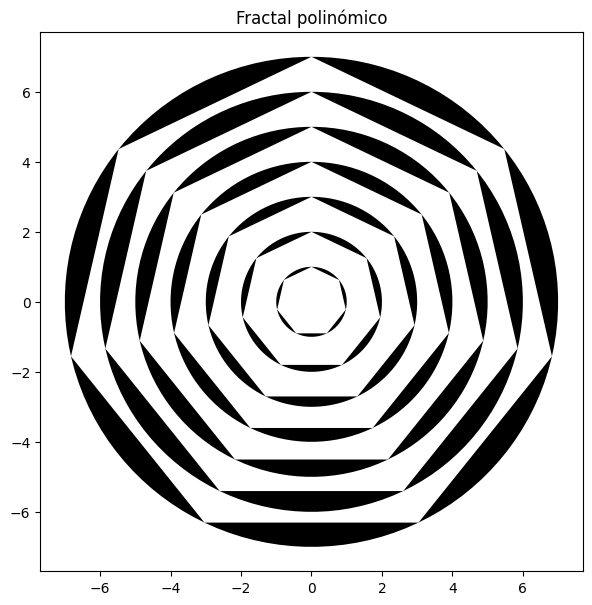

In [484]:
n = 7 ; r = 1
fig = plt.figure(figsize=(n,n)); ax = fig.add_subplot()
plt.title('Fractal polinómico')

for r in range(n,0,-1):
    plt.fill(poligonos(120,r)[0], poligonos(120,r)[1], 'black')
    plt.fill(poligonos(n,r)[0], poligonos(n,r)[1], 'white')

# Tablero de ajedrez

In [485]:
def ajedrez():
    T = np.zeros((8, 8)) # Crear una matriz 8x8 llena de ceros. Inicialmente, representa un tablero completamente negro.
    T[::2, 1::2] = 1 # filas n pares, columnas impares se rellena de 1 y es color blanco
    T[1::2, ::2] = 1 # filas n impares, columnas pares
    plt.imshow(T, cmap='gray')
    plt.axis("off")

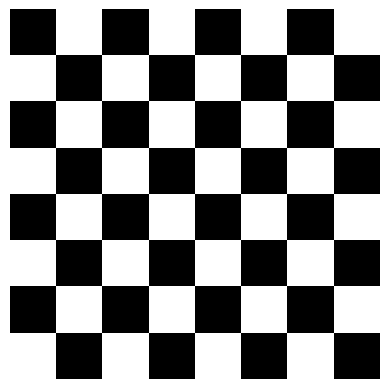

In [486]:
ajedrez()

In [487]:
n = 5
nf = n+1 # numero filas
nc = 2*n+1 # numero de columnas

T = np.zeros((nf,nc)) # Creamos una matriz de zeros con dimensiones nf x nc.
T[0,nc//2] = 1 # Configuramos el primer '1' en la fila superior y en el centro de la matriz, parte entera //.

for i in range(1,nf):
    # Establecemos unos en los bordes externos de lo que se convierte en una estructura triangular.
    T[i,n-i] = 1; T[i,n+i] = 1 
    
    # Iteramos por el rango entre los dos bordes externos y llenamos el triángulo.
    # La forma de llenarlo se asemeja al Triángulo de Pascal: cada número es la suma de los dos números directamente arriba de él.
    for j in range(n-i,n+i,2): 
        T[i,j] = T[i-1,j-1] + T[i-1,j+1]

# Imprimimos la matriz de una manera formatada. Si el número es 0, lo reemplazamos con un espacio en blanco.    
print('\n'.join([''.join(['{:3}'.format(int(item) if item != 0 else '')for item in row])for row in T]))

                 1               
              1     1            
           1     2     1         
        1     3     3     1      
     1     4     6     4     1   
  1     5    10    10     5     1


### Punto 1 Parcial G-02

In [488]:
from sympy import symbols, Eq, solve

b0, b1, b2, b3 = symbols('b0 b1 b2 b3')

# Definir las ecuaciones
eq1 = Eq(8*b0 + b1 + 3*b2 + 9*b3, 0)
eq2 = Eq(16*b0 + b1 + 4*b2 + 16*b3, 2)
eq3 = Eq(32*b0 + b1 + 5*b2 + 25*b3, 5)
eq4 = Eq(64*b0 + b1 +6*b2 + 36*b3, 9)

# Resolver el sistema de ecuaciones
solution = solve((eq1, eq2, eq3, eq4), (b0, b1, b2, b3))
    
print(solution)

{b0: 0, b1: 0, b2: -3/2, b3: 1/2}


In [489]:
def f(n):
    return -3/8*2**n + 12 - 9*n + 2*n**2

n = 10
vr = np.zeros(n)
for i in range(n):
    vr[i] = f(i+3)

print(list(vr))

[0.0, 2.0, 5.0, 6.0, -1.0, -28.0, -99.0, -262.0, -613.0, -1344.0]


### Punto 2 parcial G-02

In [490]:
raices = sp.roots([1,0,0,0,-16])
print(raices)

{-2: 1, 2: 1, -2*I: 1, 2*I: 1}


In [491]:
b0, b1, b2 = sp.symbols('b0 b1, b2')

eq1 = Eq(b0 + b1 + b2, 1)
eq2 = Eq(-b0 + 3.94*b1 + 2*b2, 1)
eq3 = Eq(b0 + 3.94**2*b1 + 4*b2, 3)

sol = sp.nsimplify(sp.solve((eq1,eq2,eq3),(b0,b1,b2)))
sol

{b0: 1/3, b1: 0, b2: 2/3}

### Punto 3

In [492]:
b0, b1 = sp.symbols('b0 b1')

eq1 = Eq(b0+3*b1,2)
eq2 = Eq(b0+9*b1,5)

sol = sp.nsimplify(sp.solve((eq1,eq2),(b0,b1)))

sol

{b0: 1/2, b1: 1/2}

In [493]:
b0, b1, b2, b3, b4= sp.symbols('b0 b1 b2 b3 b4')
n = sp.Symbol("n")

In [494]:
eq = b0*(-2)**n + b1*2**n + b2*(-2j)**n + b3*(2j)**n + b4*(-1)**n
eq1 = Eq(eq.subs(n, 0), 1)
eq2 = Eq(eq.subs(n, 1), 1)
eq3 = Eq(eq.subs(n, 2), 3)
eq4 = Eq(eq.subs(n, 3), 5)
eq5 = Eq(eq.subs(n, 4), 11)

sol = sp.nsimplify(sp.solve((eq1,eq2,eq3,eq4,eq5),(b0,b1,b2,b3,b4)))

sol

{b0: 0, b1: 2/3, b2: 0, b3: 0, b4: 1/3}

In [495]:
eq = b0*(-2)**n + b1*2**n + b2*(-2j)**n + b3*(2j)**n + b4*(-1)**n
sol_eqs = [1,1,3,5,11]
eqs = [Eq(eq.subs(n, i), sol_eqs[i]) for i in range(5)]
sol = sp.nsimplify(sp.solve(eqs,(b0,b1,b2,b3,b4)))
sol

{b0: 0, b1: 2/3, b2: 0, b3: 0, b4: 1/3}